In [44]:
#
import sys
PATH_TO_SRC = '/Users/masaver/Desktop/masaver/data_science_projects/sep24_bds_int_medical'
sys.path.append( PATH_TO_SRC )

# Load other requiered libraries
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Mute warnings
import warnings
warnings.filterwarnings("ignore")

# Import pretty printer
from pprint import pprint as pp

# Import metrics for scoring
from sklearn.metrics import make_scorer, mean_squared_error , root_mean_squared_error
rmse_scorer = make_scorer(mean_squared_error, greater_is_better=False, squared=False)

# Import the preprocessign pipeline
from pipelines import *

#For clearing intermidiate output
from IPython.display import clear_output


In [2]:
# Prep input data
data_file = os.path.join('..', '..', 'data', 'raw', 'train.csv')
test_file = os.path.join('..', '..', 'data', 'raw', 'test.csv')

df_train = pd.read_csv(data_file, index_col = 0 , parse_dates = True )
df_test = pd.read_csv(test_file, index_col = 0 , parse_dates = True )

X = df_train.drop( 'bg+1:00' , axis = 1 )
y = df_train['bg+1:00']

# Train/Test split
x_train,x_test,y_train,y_test = train_test_split( X , y , test_size=0.2 , random_state=17 )
data_pipe = pipeline
x_train_s = data_pipe.fit_transform( x_train )
x_test_s = data_pipe.transform( x_test )
df_test_s = data_pipe.transform( df_test )

display( x_train_s )
display( x_test_s )
display( df_test_s )

,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,bg-5:20,bg-5:15,bg-5:10,...,cals-0:20,cals-0:15,cals-0:10,cals-0:05,cals-0:00,day_phase_evening,day_phase_late_evening,day_phase_morning,day_phase_night,day_phase_noon
id,,,,,,,,,,,,,,,,,,,,,
p11_1931,1.070766,1.070826,1.038514,1.072986,1.006228,0.906149,0.807175,0.740506,0.807027,0.841313,...,-0.340384,-0.340243,-0.292363,-0.340841,-0.339770,-0.443364,-0.297725,-0.449313,1.737408,-0.450584
p10_9422,-0.891197,-0.891003,-0.824940,-0.792237,-0.691954,-0.725040,-0.792106,-0.791652,-0.791558,-0.892230,...,-0.193047,0.153391,-0.113184,-0.257663,0.061199,-0.443364,-0.297725,-0.449313,-0.575570,2.219343
p06_8273,0.073158,0.073286,0.073511,-0.026163,-0.125893,-0.225696,-0.314543,-0.403061,-0.491823,-0.547744,...,0.715084,3.555319,3.882235,3.615447,1.483431,-0.443364,-0.297725,-0.449313,-0.575570,-0.450584
p12_17133,-0.458900,-0.491987,-0.458904,-0.459162,-0.458870,-0.492013,-0.492241,-0.491882,-0.458519,-0.458845,...,4.658358,4.470348,3.888921,4.029992,4.043986,-0.443364,-0.297725,2.225619,-0.575570,-0.450584
p03_2346,-0.658422,-0.658244,-0.625284,-0.659007,-0.625358,-0.725040,-0.758787,-0.758344,-0.758254,-0.792218,...,-0.371191,-0.023194,0.353483,-0.339499,-0.354571,-0.443364,-0.297725,-0.449313,-0.575570,2.219343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
p02_17172,-0.159617,-0.159474,-0.159421,-0.159394,-0.259084,-0.325565,-0.392286,-0.425266,-0.458519,-0.492182,...,-0.850706,-0.849930,-0.849957,-0.851978,-0.852420,-0.443364,-0.297725,-0.449313,-0.575570,-0.450584
p10_23964,0.837991,0.904569,0.971962,0.973063,0.906335,0.839570,0.740538,0.540659,0.374077,0.241240,...,0.232891,-0.128877,1.423207,2.249730,-0.034334,-0.443364,-0.297725,-0.449313,-0.575570,-0.450584
p03_7966,1.902107,1.868858,1.803861,1.672522,1.572288,1.405492,1.240313,1.140199,1.006851,0.874650,...,-0.387264,-0.387065,-0.387301,-0.387795,-0.386864,-0.443364,-0.297725,-0.449313,1.737408,-0.450584


,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,bg-5:20,bg-5:15,bg-5:10,...,cals-0:20,cals-0:15,cals-0:10,cals-0:05,cals-0:00,day_phase_evening,day_phase_late_evening,day_phase_morning,day_phase_night,day_phase_noon
id,,,,,,,,,,,,,,,,,,,,,
p11_17351,0.804738,0.804815,0.672478,0.706603,0.839740,1.006018,1.173677,1.473277,1.539712,1.541397,...,-0.340384,-0.340243,-0.340501,-0.340841,-0.339770,-0.443364,-0.297725,-0.449313,1.737408,-0.450584
p10_15385,-0.824690,-0.791249,-0.824940,-0.792237,-0.825144,-0.791619,-0.792106,-0.791652,-0.691646,-0.658869,...,-0.353778,-0.321514,-0.353872,-0.354256,-0.353226,-0.443364,-0.297725,2.225619,-0.575570,-0.450584
p06_2496,-1.090719,-1.090511,-1.091148,-1.069800,-1.047129,-1.024646,-1.025334,-1.024806,-1.024685,-0.970018,...,1.474540,0.712575,0.366854,0.449344,-0.277876,-0.443364,-0.297725,-0.449313,-0.575570,2.219343
p10_8410,-0.625168,-0.591741,-0.592008,-0.559084,-0.525465,-0.525302,-0.558877,-0.625113,-0.724950,-0.825556,...,3.739511,3.640936,3.700382,3.997794,3.916160,-0.443364,3.358808,-0.449313,-0.575570,-0.450584
p02_2562,0.438948,0.405799,0.339719,0.306912,0.306977,0.273647,0.240763,0.240889,0.207558,0.207903,...,-0.539959,-0.887388,-0.407359,-0.269737,-0.394937,-0.443364,-0.297725,2.225619,-0.575570,-0.450584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
p02_24761,0.904498,0.339296,0.006959,-0.159394,-0.325679,-0.591881,-0.792106,-0.924883,-0.958077,-0.992242,...,-0.310917,-0.310812,-0.311083,-0.311326,-0.310169,-0.443364,-0.297725,-0.449313,1.737408,-0.450584
p10_22597,-0.691675,-0.857752,-0.991320,-1.058697,-0.858442,-0.824908,-0.758787,-0.958191,-0.958077,-0.958905,...,0.341384,0.024966,0.072680,1.035609,0.140586,2.255485,-0.297725,-0.449313,-0.575570,-0.450584
p03_2231,0.671723,0.405799,0.572651,0.639988,0.606656,0.806280,1.007085,0.907045,0.707116,0.674626,...,-0.387264,-0.387065,-0.387301,-0.387795,-0.386864,-0.443364,-0.297725,-0.449313,1.737408,-0.450584


,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,bg-5:20,bg-5:15,bg-5:10,...,cals-0:20,cals-0:15,cals-0:10,cals-0:05,cals-0:00,day_phase_evening,day_phase_late_evening,day_phase_morning,day_phase_night,day_phase_noon
id,,,,,,,,,,,,,,,,,,,,,
p01_8459,0.305933,0.306045,0.417363,0.528963,0.639953,0.650929,0.662795,0.673890,0.662711,0.652401,...,-0.494418,-0.494086,-0.494274,-0.481705,-0.324969,-0.443364,-0.297725,2.225619,-0.575570,-0.450584
p01_8460,0.538709,0.538804,0.539375,0.484552,0.429068,0.373516,0.340718,0.307505,0.274166,0.185678,...,1.098161,1.956694,2.943552,2.157161,3.223209,-0.443364,-0.297725,-0.449313,-0.575570,2.219343
p01_8461,-0.924450,-0.924255,-0.924768,-0.925467,-0.925037,-0.958067,-0.992016,-1.024806,-1.024685,-1.025580,...,-0.222515,-0.262653,-0.070396,1.511867,0.226700,-0.443364,-0.297725,-0.449313,-0.575570,-0.450584
p01_8462,-1.622776,-1.622533,-1.568103,-1.513901,-1.457800,-1.368638,-1.280775,-1.191345,-1.257812,-1.325616,...,-0.481024,-0.494086,-0.494274,-0.481705,-0.494507,-0.443364,-0.297725,-0.449313,1.737408,-0.450584
p01_8463,0.006651,0.006783,0.006959,0.195887,0.384671,0.573253,0.818281,1.062481,1.306585,1.374710,...,-0.494418,-0.494086,-0.494274,-0.495121,-0.494507,-0.443364,-0.297725,-0.449313,1.737408,-0.450584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
p24_256,-0.325885,-0.325731,-0.392352,-0.525777,-0.492168,-0.492013,-0.458922,-0.458574,-0.491823,-0.525519,...,-0.570766,-0.425860,-0.581189,-0.582323,-0.571203,-0.443364,-0.297725,2.225619,-0.575570,-0.450584
p24_257,-0.758182,-0.691495,-0.691836,-0.692314,-0.825144,-0.924777,-0.858742,-0.824960,-0.791558,-0.592194,...,-0.560050,-0.147605,-0.325792,-0.560858,-0.425885,-0.443364,-0.297725,-0.449313,-0.575570,2.219343
p24_258,1.370049,1.403339,1.471101,1.605907,1.638884,1.671809,1.573497,1.539892,1.506408,1.541397,...,-0.581481,-0.581040,-0.581189,-0.582323,-0.581967,-0.443364,-0.297725,-0.449313,1.737408,-0.450584


In [48]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import regularizers

# Define the DNN model
def create_regression_model(input_dim , lr = 0.01):
    
    model = Sequential()

    # Input Layer
    model.add(Dense(128, activation='relu', input_dim=input_dim))
    model.add(BatchNormalization())  # Optional: Normalize activations
    model.add(Dropout(0.3))          # Optional: Regularization to prevent overfitting

    # Hidden Layers
    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    model.add(Dense(32, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    # Output Layer
    model.add(Dense(1, activation='linear'))  # Linear activation for regression

    # Compile the model
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=lr),  # Optimizer
        loss=rmse,                               # Loss function
        metrics=['mean_squared_error', 'mean_absolute_error',rmse]    # Metrics
    )

    # Display the model summary
    model.summary()

    return model

def rmse(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_true - y_pred)))

# regression_model = create_regression_model( 293 )

#

In [4]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,  # Stop after 10 epochs with no improvement
    restore_best_weights=True
)

history = regression_model.fit(
    x_train_s,
    y_train,
    validation_data=(x_test_s, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100
4426/4426 ━━━━━━━━━━━━━━━━━━━━ 4s 670us/step - loss: 3.9533 - mean_absolute_error: 3.3439 - mean_squared_error: 20.4167 - rmse: 3.9533 - val_loss: 2.0357 - val_mean_absolute_error: 1.5252 - val_mean_squared_error: 4.2612 - val_rmse: 2.0354
Epoch 2/100
4426/4426 ━━━━━━━━━━━━━━━━━━━━ 3s 662us/step - loss: 2.3264 - mean_absolute_error: 1.7775 - mean_squared_error: 5.5593 - rmse: 2.3264 - val_loss: 2.0114 - val_mean_absolute_error: 1.5218 - val_mean_squared_error: 4.1535 - val_rmse: 2.0112
Epoch 3/100
4426/4426 ━━━━━━━━━━━━━━━━━━━━ 3s 639us/step - loss: 2.2541 - mean_absolute_error: 1.7125 - mean_squared_error: 5.2187 - rmse: 2.2541 - val_loss: 1.9758 - val_mean_absolute_error: 1.4886 - val_mean_squared_error: 4.0090 - val_rmse: 1.9755
Epoch 4/100
4426/4426 ━━━━━━━━━━━━━━━━━━━━ 3s 631us/step - loss: 2.2062 - mean_absolute_error: 1.6770 - mean_squared_error: 5.0059 - rmse: 2.2062 - val_loss: 1.9636 - val_mean_absolute_error: 1.4733 - val_mean_squared_error: 3.9646 - val_rmse: 1.

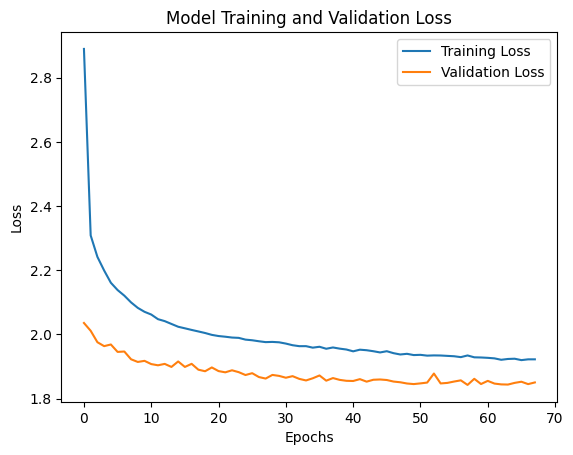

In [20]:
import matplotlib.pyplot as plt
def plot_res( history ):
    # Plot training and validation loss
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Model Training and Validation Loss')
    plt.show()

plot_res( history )

In [11]:
def get_score( model ):
    
    y_train_pred = model.predict( x_train_s )
    y_test_pred = model.predict( x_test_s )
    
    train_rmse = root_mean_squared_error( y_train , y_train_pred )
    test_rmse = root_mean_squared_error( y_test , y_test_pred )

    print(f"Train set RMSE: {train_rmse}")
    print(f"Test set RMSE: {test_rmse}")

get_score( regression_model )

4426/4426 ━━━━━━━━━━━━━━━━━━━━ 1s 315us/step
1107/1107 ━━━━━━━━━━━━━━━━━━━━ 0s 260us/step
Train set RMSE: 1.7369110038982043
Test set RMSE: 1.8694584321448109


In [14]:
pred_df = pd.DataFrame({
    'id' : df_test_s.index , 
    'bg+1:00' :  regression_model.predict( df_test_s ).flatten()
})

pred_df.to_csv( 'DNN_demo.csv' , index=False )
pred_df

114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step


,id,bg+1:00
0,p01_8459,8.278723
1,p01_8460,5.813606
2,p01_8461,6.838868
3,p01_8462,11.112461
4,p01_8463,6.588075
...,...,...
3639,p24_256,6.506987
3640,p24_257,10.691330
3641,p24_258,6.612221
3642,p24_259,8.839888


Test 2: Add one more hidden layer with 16 units


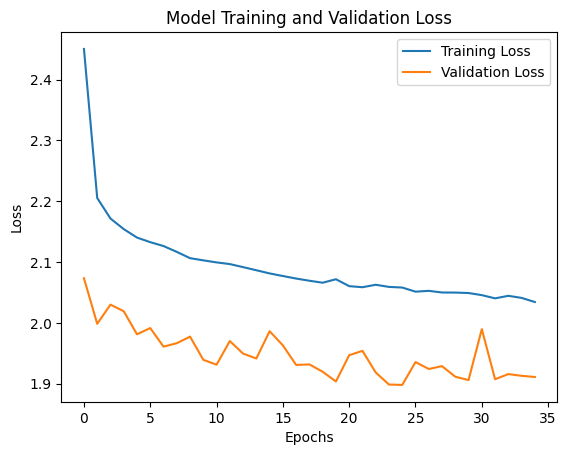

4426/4426 ━━━━━━━━━━━━━━━━━━━━ 2s 525us/step
1107/1107 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step
Train set RMSE: 1.8704701233141863
Test set RMSE: 1.9233982641500764


In [45]:
model = Sequential()

# Input Layer
input_dim=293
lr = 0.01

model.add(Dense(128, activation='relu', input_dim=input_dim))
model.add(BatchNormalization())  # Optional: Normalize activations
model.add(Dropout(0.3))          # Optional: Regularization to prevent overfitting

# Hidden Layers
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Output Layer
model.add(Dense(1, activation='linear'))  # Linear activation for regression

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=lr),  # Optimizer
    loss=rmse,                               # Loss function
    metrics=['mean_squared_error', 'mean_absolute_error',rmse]    # Metrics
)

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,  # Stop after 10 epochs with no improvement
    restore_best_weights=True
)

history = model.fit(
    x_train_s,
    y_train,
    validation_data=(x_test_s, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

clear_output( wait=True )
plot_res( history )
get_score( model )

Test 3: Add a kernel regularizer

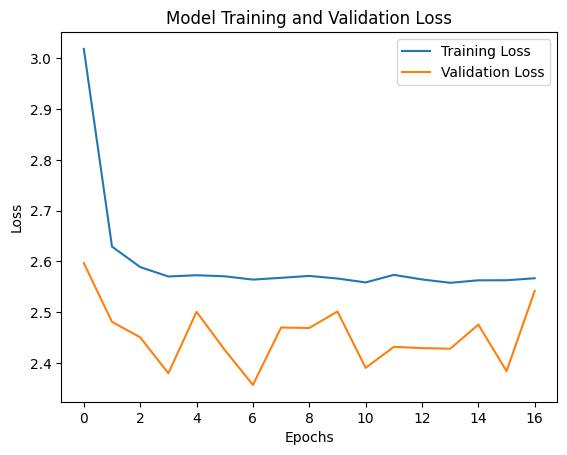

4426/4426 ━━━━━━━━━━━━━━━━━━━━ 1s 291us/step
1107/1107 ━━━━━━━━━━━━━━━━━━━━ 0s 255us/step
Train set RMSE: 2.2386899474667605
Test set RMSE: 2.2311664863000695


In [52]:
model = Sequential()

# Input Layer
input_dim=293
lr = 0.01

model.add(Dense(128, activation='relu', input_dim=input_dim,kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())  # Optional: Normalize activations
model.add(Dropout(0.3))          # Optional: Regularization to prevent overfitting

# Hidden Layers
model.add(Dense(64, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(32, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Output Layer
model.add(Dense(1, activation='linear'))  # Linear activation for regression

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=lr),  # Optimizer
    loss=rmse,                               # Loss function
    metrics=['mean_squared_error', 'mean_absolute_error',rmse]    # Metrics
)

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,  # Stop after 10 epochs with no improvement
    restore_best_weights=True
)

history = model.fit(
    x_train_s,
    y_train,
    validation_data=(x_test_s, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

clear_output( wait=True )
plot_res( history )
get_score( model )

Test 4: Add an Extra Hidden Layer

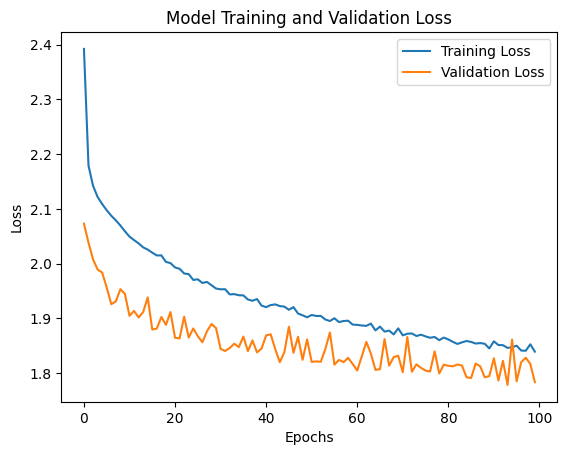

4426/4426 ━━━━━━━━━━━━━━━━━━━━ 2s 396us/step
1107/1107 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step
Train set RMSE: 1.5670070489189238
Test set RMSE: 1.805635392167826


In [57]:
model = Sequential()

# Input Layer
input_dim=293
lr = 0.01

model.add(Dense(256, activation='relu', input_dim=input_dim))
model.add(BatchNormalization())  # Optional: Normalize activations
model.add(Dropout(0.3))          # Optional: Regularization to prevent overfitting

# Hidden Layers
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Output Layer
model.add(Dense(1, activation='linear'))  # Linear activation for regression

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=lr),  # Optimizer
    loss=rmse,                               # Loss function
    metrics=['mean_squared_error', 'mean_absolute_error',rmse]    # Metrics
)

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=20,  # Stop after 10 epochs with no improvement
    restore_best_weights=True
)

history = model.fit(
    x_train_s,
    y_train,
    validation_data=(x_test_s, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

clear_output( wait=True )
plot_res( history )
get_score( model )

Test 5: Increase batch size to 64 

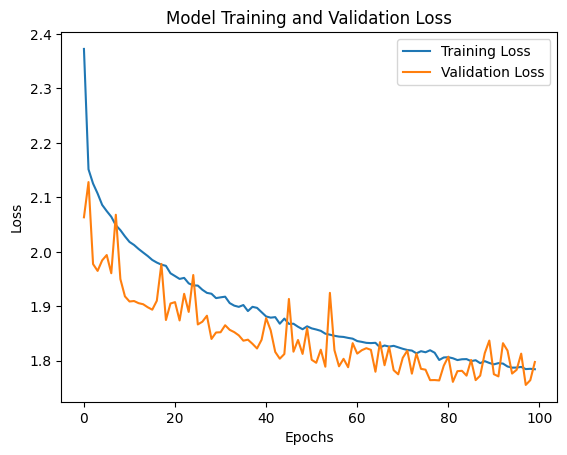

4426/4426 ━━━━━━━━━━━━━━━━━━━━ 2s 341us/step
1107/1107 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step
Train set RMSE: 1.469465065125439
Test set RMSE: 1.7690855581232467


In [62]:
model = Sequential()

# Input Layer
input_dim=293
lr = 0.02

model.add(Dense(256, activation='relu', input_dim=input_dim))
model.add(BatchNormalization())  # Optional: Normalize activations
model.add(Dropout(0.3))          # Optional: Regularization to prevent overfitting

# Hidden Layers
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Output Layer
model.add(Dense(1, activation='linear'))  # Linear activation for regression

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=lr),  # Optimizer
    loss=rmse,                               # Loss function
    metrics=['mean_squared_error', 'mean_absolute_error',rmse]    # Metrics
)

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=20,  # Stop after 10 epochs with no improvement
    restore_best_weights=True
)

history = model.fit(
    x_train_s,
    y_train,
    validation_data=(x_test_s, y_test),
    epochs=100,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)

clear_output( wait=True )
plot_res( history )
get_score( model )

In [61]:
pred_df = pd.DataFrame({
    'id' : df_test_s.index , 
    'bg+1:00' :  model.predict( df_test_s ).flatten()
})

pred_df.to_csv( 'DNN_Test_5_dev.csv' , index=False )
pred_df

114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step


,id,bg+1:00
0,p01_8459,8.171208
1,p01_8460,5.874706
2,p01_8461,8.151119
3,p01_8462,11.865165
4,p01_8463,6.434323
...,...,...
3639,p24_256,6.398131
3640,p24_257,9.941607
3641,p24_258,6.180462
3642,p24_259,8.828634


Test 6: Add a kernel regularizer t

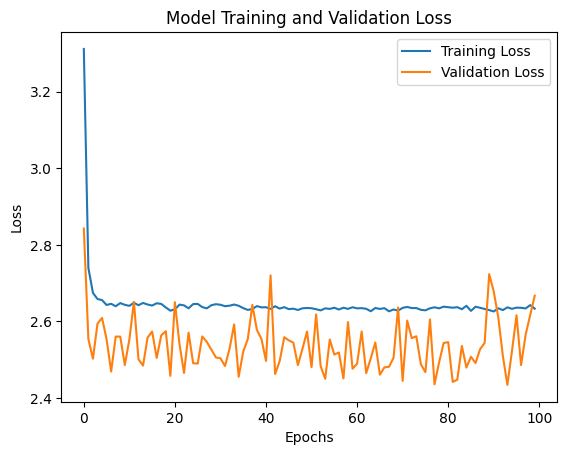

4426/4426 ━━━━━━━━━━━━━━━━━━━━ 2s 331us/step
1107/1107 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step
Train set RMSE: 2.26727586088501
Test set RMSE: 2.263508806290003


In [ ]:
from tensorflow.keras.regularizers import l2
model = Sequential()

# Input Layer
input_dim=293
lr = 0.01

model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01), input_dim=input_dim))
model.add(BatchNormalization())  # Optional: Normalize activations
model.add(Dropout(0.3))          # Optional: Regularization to prevent overfitting

# Hidden Layers
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Output Layer
model.add(Dense(1, activation='linear'))  # Linear activation for regression

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=lr),  # Optimizer
    loss=rmse,                               # Loss function
    metrics=['mean_squared_error', 'mean_absolute_error',rmse]    # Metrics
)

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=20,  # Stop after 10 epochs with no improvement
    restore_best_weights=True
)

history = model.fit(
    x_train_s,
    y_train,
    validation_data=(x_test_s, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

clear_output( wait=True )
plot_res( history )
get_score( model )

Test 7: Reduce gamma

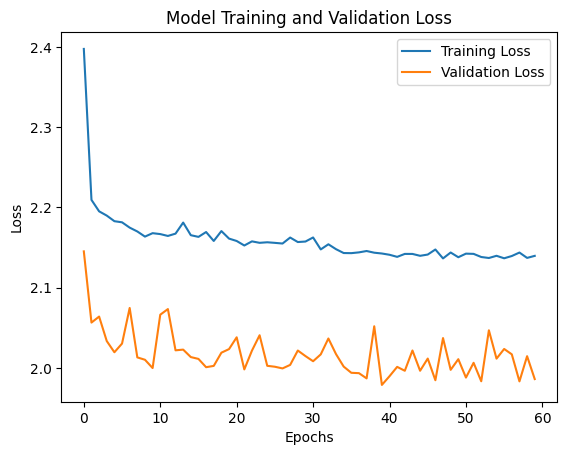

4426/4426 ━━━━━━━━━━━━━━━━━━━━ 2s 338us/step
1107/1107 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step
Train set RMSE: 1.9210676026337556
Test set RMSE: 1.9484517290813328


In [66]:
from tensorflow.keras.regularizers import l2
model = Sequential()

# Input Layer
input_dim=293
lr = 0.01
gamma = 1e-6

model.add(Dense(256, activation='relu', kernel_regularizer=l2(gamma), input_dim=input_dim))
model.add(BatchNormalization())  # Optional: Normalize activations
model.add(Dropout(0.3))          # Optional: Regularization to prevent overfitting

# Hidden Layers
model.add(Dense(128, activation='relu', kernel_regularizer=l2(gamma)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(64, activation='relu', kernel_regularizer=l2(gamma)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(32, activation='relu', kernel_regularizer=l2(gamma)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Output Layer
model.add(Dense(1, activation='linear'))  # Linear activation for regression

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=lr),  # Optimizer
    loss=rmse,                               # Loss function
    metrics=['mean_squared_error', 'mean_absolute_error',rmse]    # Metrics
)

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=20,  # Stop after 10 epochs with no improvement
    restore_best_weights=True
)

history = model.fit(
    x_train_s,
    y_train,
    validation_data=(x_test_s, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

clear_output( wait=True )
plot_res( history )
get_score( model )
